## **1. Loading libraries and data**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns',200)
np.random.seed(24)

In [ ]:
df = pd.read_csv(
    "/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv",
    dtype={
        'Duration' : 'int8',
        'Distance' : 'int8',
        'PLong' : 'float32',
        'PLatd' : 'float32',
        'DLong' : 'float32',
        'DLatd' : 'float32',
        'Haversine' : 'float32',
        'Pmonth' : 'int8',
        'Pday' : 'int8',
        'Phour' : 'int8',
        'Pmin' : 'int8',
        'PDweek' : 'int8',
        'Dmonth' : 'int8',
        'Dday' : 'int8',
        'Dhour' : 'int8',
        'Dmin' : 'int8',
        'DDweek' : 'int8',
        'Temp' : 'float32',
        'Precip' : 'float32',
        'Wind' : 'float32',
        'Humid' : 'float32',
        'Solar' : 'float32',
        'Snow' : 'float32',
        'GroundTemp' : 'float32',
        'Dust' : 'float32'
    },
    index_col=0
).sample(frac=1)
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6176536,19,-120,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.900000,0.0,1.7,68.0,0.00,0.0,20.000000,27.0
8576807,16,-102,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.799999,0.0,1.1,46.0,1.71,0.0,23.200001,58.0
8714908,5,-44,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.300000,0.0,0.3,85.0,0.07,0.0,8.700000,83.0
4599459,6,-44,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.799999,0.0,1.3,39.0,2.80,0.0,54.900002,37.0
4460101,59,-80,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0


In [ ]:
df.shape

(9601139, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9601139 entries, 6176536 to 6452179
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int8(12)
memory usage: 659.3 MB


## **2. Exploratory Data Analysis**

In [ ]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.754739e+01,1.269909e+02,3.754747e+01,1.269907e+02,1.870314e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856200e+01,1.784856e-02,1.819273e+00,5.397561e+01,7.300681e-01,9.948924e-03,2.072376e+01,3.245799e+01
std,2.504333e+01,7.404757e+01,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736281e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


**Observations:**
1. Distance: there are data points where the distance value is negatice (-ve)
2. Haversine: there are data points where the haversine value is 0.

**Observation analysis 1. Distance**  
Exploring the data points where the distance is negative.

In [ ]:
df.shape

(9601139, 25)

In [ ]:
df[df['Distance']<0].shape

(4787174, 25)

In [ ]:
df[df['Distance']<0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6176536,19,-120,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.900000,0.0,1.7,68.0,0.00,0.0,20.000000,27.0
8576807,16,-102,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.799999,0.0,1.1,46.0,1.71,0.0,23.200001,58.0
8714908,5,-44,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.300000,0.0,0.3,85.0,0.07,0.0,8.700000,83.0
4599459,6,-44,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.799999,0.0,1.3,39.0,2.80,0.0,54.900002,37.0
4460101,59,-80,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0


In [ ]:
# transforming all the -ve distance to +ve distance
df['Distance'] = df['Distance'].apply(lambda x: abs(x))

In [ ]:
df[df['Distance']<0].shape

(0, 25)

**Observation analysis 2. haversine**    
Exploring the data points where the haversine value is 0.   
It should mean that pick up and drop off location (longitude and latitude) are the same.

In [ ]:
df.shape

(9601139, 25)

In [ ]:
df[df['Haversine']==0].shape

(955083, 25)

In [ ]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,59,80,37.556610,126.898018,37.556610,126.898018,0.0,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0
1,47,120,37.546631,127.155884,37.546631,127.155884,0.0,3,17,16,24,5,3,17,17,12,5,13.700000,0.0,2.1,28.0,1.88,0.0,18.500000,43.0
2,66,40,37.658588,127.035210,37.658588,127.035210,0.0,8,21,20,57,1,8,21,22,4,1,27.700001,0.0,1.6,69.0,0.01,0.0,24.799999,26.0
3,17,32,37.519363,126.926048,37.519363,126.926048,0.0,3,28,17,24,2,3,28,17,42,2,17.600000,0.0,4.2,45.0,0.70,0.0,17.100000,28.0
4,39,36,37.537308,127.070351,37.537308,127.070351,0.0,6,16,21,6,5,6,16,21,45,5,23.700001,0.0,1.7,64.0,0.00,0.0,21.900000,33.0


In [ ]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.0,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000
mean,49.878425,63.555497,37.546593,126.989731,37.546593,126.989731,0.0,7.367401,15.648030,15.695371,29.346679,3.190157,7.368260,15.646774,15.795307,29.606122,3.191605,20.290329,0.015202,1.937013,51.137749,0.896492,0.007591,23.291321,32.303013
std,30.473000,36.989730,0.045334,0.084399,0.045334,0.084399,0.0,2.556475,8.761283,5.232936,17.260827,2.066626,2.556467,8.761114,5.831401,17.347721,2.069881,8.441665,0.309063,0.961516,17.037958,0.991830,0.143294,11.826364,23.582991
min,2.000000,0.000000,37.437271,126.798599,37.437271,126.798599,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.799999,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,26.000000,32.000000,37.514088,126.918503,37.514088,126.918503,0.0,5.000000,8.000000,13.000000,14.000000,1.000000,5.000000,8.000000,13.000000,15.000000,1.000000,15.700000,0.000000,1.200000,38.000000,0.000000,0.000000,15.800000,16.000000
50%,47.000000,64.000000,37.542816,126.995476,37.542816,126.995476,0.0,8.000000,16.000000,17.000000,29.000000,3.000000,8.000000,16.000000,17.000000,29.000000,3.000000,21.600000,0.000000,1.800000,50.000000,0.510000,0.000000,23.299999,27.000000
75%,69.000000,96.000000,37.572113,127.062424,37.572113,127.062424,0.0,9.000000,23.000000,20.000000,44.000000,5.000000,9.000000,23.000000,20.000000,45.000000,5.000000,26.299999,0.000000,2.600000,63.000000,1.680000,0.000000,30.299999,42.000000
max,119.000000,128.000000,37.689720,127.180267,37.689720,127.180267,0.0,12.000000,31.000000,23.000000,59.000000,6.000000,12.000000,31.000000,23.000000,59.000000,6.000000,39.400002,35.000000,7.400000,98.000000,3.520000,8.800000,62.200001,304.000000


- Despite having a haversine distance of 0, indicating that the pick-up and drop-off locations are identical, the duration of trips exhibits a minimum value of 2 minutes and a maximum value of 119 minutes.
- This suggests that bicycles may have traveled round-trip journeys, returning to the pick-up location after visiting other destinations.
- The removal of such data points could potentially impact the performance of the model. However we dont have any additional info about round trips. Hence we can remove them for the time being.

- **NOTE**: In future we can add new feature to record the round trips or better an new long,latd coumns to record the co-ordinates of the midpoint of the entire journey. Which will help us in confirming about round trips.

In [ ]:
df[df['Distance']==0].shape

(69022, 25)

In [ ]:
df[df['Distance']==0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7031292,6,0,37.483879,127.089027,37.487350,127.100998,1.124556,10,1,17,5,0,10,1,17,11,0,17.200001,0.0,2.9,53.0,0.25,0.0,21.000000,14.0
5257598,18,0,37.472610,126.983009,37.488453,126.974213,1.925067,8,20,19,33,0,8,20,19,53,0,30.799999,0.0,1.9,55.0,0.06,0.0,32.200001,35.0
3491259,10,0,37.479465,127.125328,37.484531,127.120163,0.724591,6,30,0,15,5,6,30,0,26,5,23.000000,0.0,1.9,84.0,0.00,0.0,21.100000,48.0
233250,23,0,37.469139,126.897202,37.475319,126.898888,0.703109,2,15,20,46,3,2,15,21,10,3,-0.400000,0.0,2.2,27.0,0.00,0.0,-0.600000,19.0
4330145,61,0,37.501713,126.995476,37.506199,127.003944,0.898223,7,24,8,56,1,7,24,9,58,1,29.900000,0.0,0.8,59.0,1.03,0.0,30.700001,22.0


In [ ]:
filtered_df = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

# Print the filtered DataFrame
filtered_df

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1105115,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
1105116,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7146901,54,0,37.520451,127.104202,37.520451,127.104202,0.0,10,3,17,10,2,10,3,17,10,2,23.299999,0.0,1.7,36.0,0.95,0.0,25.299999,19.0
7417857,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,29,1,10,9,16,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
1105117,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7410566,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,22,1,10,9,16,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410409,65,0,37.526264,126.920509,37.526264,126.920509,0.0,10,9,16,18,1,10,9,16,18,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7417860,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,29,1,10,9,16,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410415,65,0,37.526264,126.920509,37.526264,126.920509,0.0,10,9,16,18,1,10,9,16,18,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410564,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,22,1,10,9,16,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0


In [ ]:
filtered_df.shape

(15, 25)

If both the Haversine distance and the actual distance are 0, then it is likely that the bicycle has not moved at all. This could be due to a number of reasons, such as:

- The bicycle was parked for the entire duration of the trip.
- The bicycle was moved a very short distance, but not enough to register on the GPS device.
- There was an error in the GPS data.

Removing these data points would be good for having better model performance

In [ ]:
df = df.drop(filtered_df.index)

In [ ]:
filtered_df_H0 = df.loc[df['Haversine']==0]
df = df.drop(filtered_df_H0.index)

In [ ]:
df.shape

(8646056, 25)

In [ ]:
filtered_df1 = df.loc[(df['Distance'] == 0) & (df['Haversine'] == 0)]
filtered_df1.shape

(0, 25)

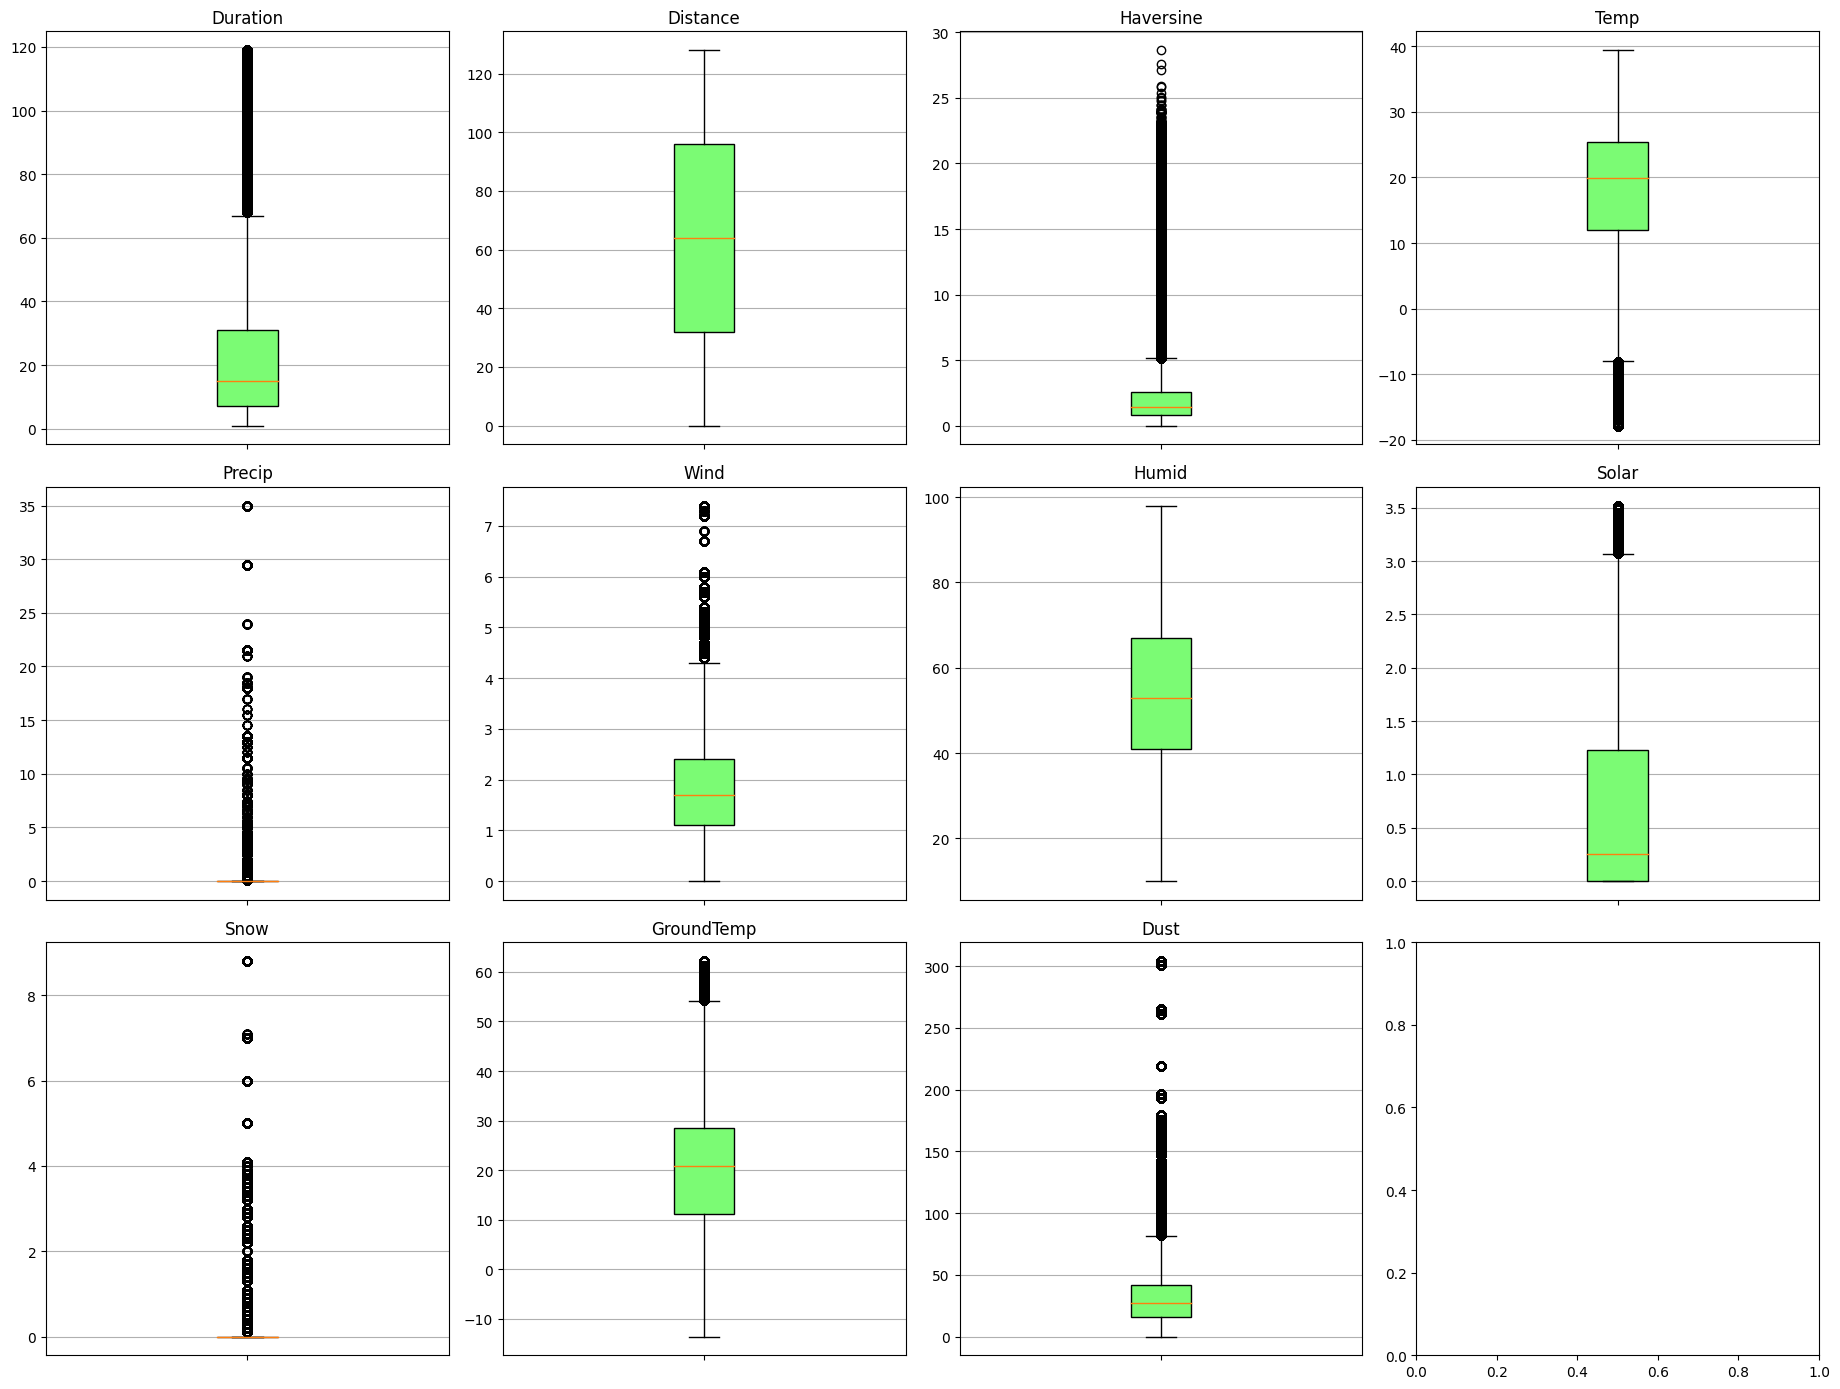

In [ ]:
num_vars = ['Duration', 'Distance', 'Haversine','Temp','Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust']

fig, axes = plt.subplots(nrows=3,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('#7BFB74')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

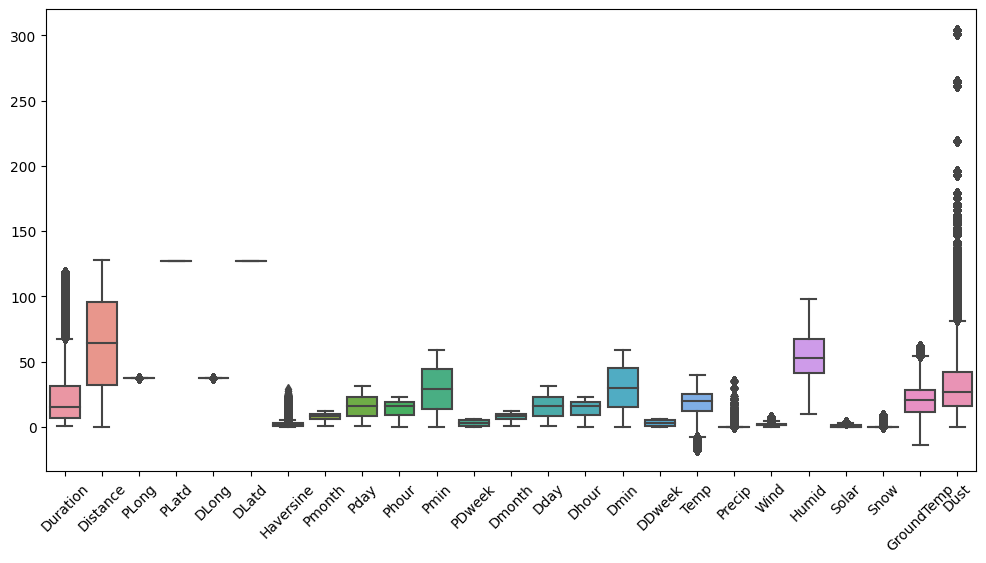

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=df.select_dtypes(include=[np.number]),
    ax=ax
)
plt.xticks(rotation=45)
plt.show()

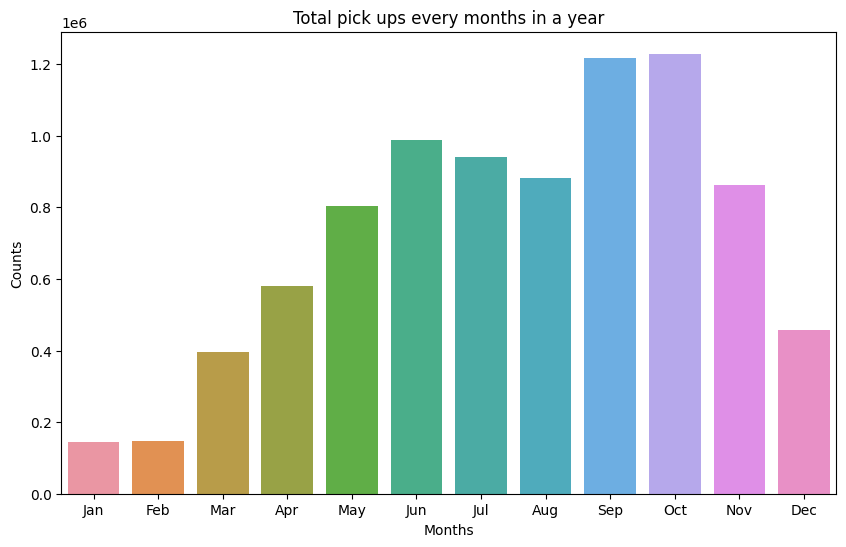

In [ ]:
# Total pick ups every months in a year
pivot_table1 = df.pivot_table(index='Pmonth', aggfunc={'Pmonth': 'count'})

month_map ={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
pivot_table1.index = pivot_table1.index.map(month_map)

# Get the pick-up months and trip counts
pick_up_months = pivot_table1.index.to_numpy()
trips_count = pivot_table1['Pmonth'].to_numpy()

plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months,y=trips_count)
plt.xlabel("Months")
plt.ylabel("Counts")
plt.title("Total pick ups every months in a year")
plt.show()

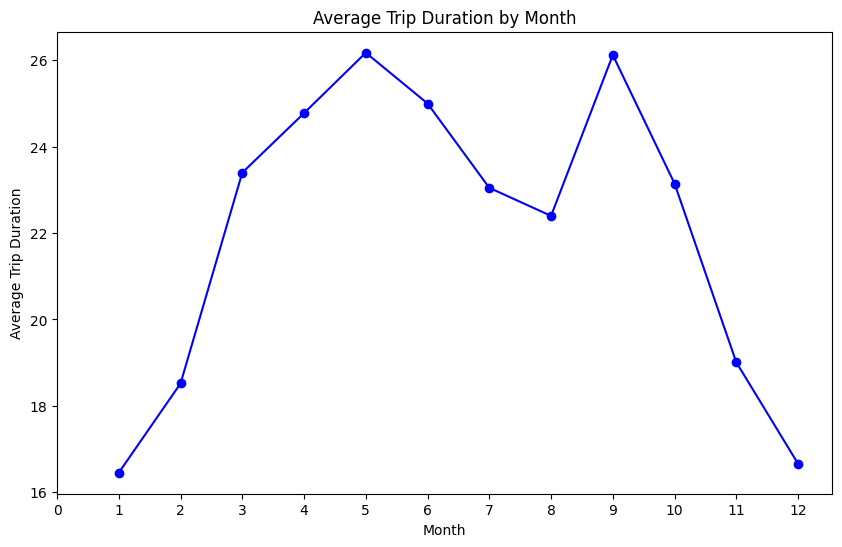

In [ ]:
# Calculate average trip duration by month
df_avg_duration_by_month = df.groupby(['Pmonth'])['Duration'].mean()

# Plot average trip duration by month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_month.index, df_avg_duration_by_month.values,'b-o')
plt.xlabel('Month')
plt.xticks(range(len(df_avg_duration_by_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.show()

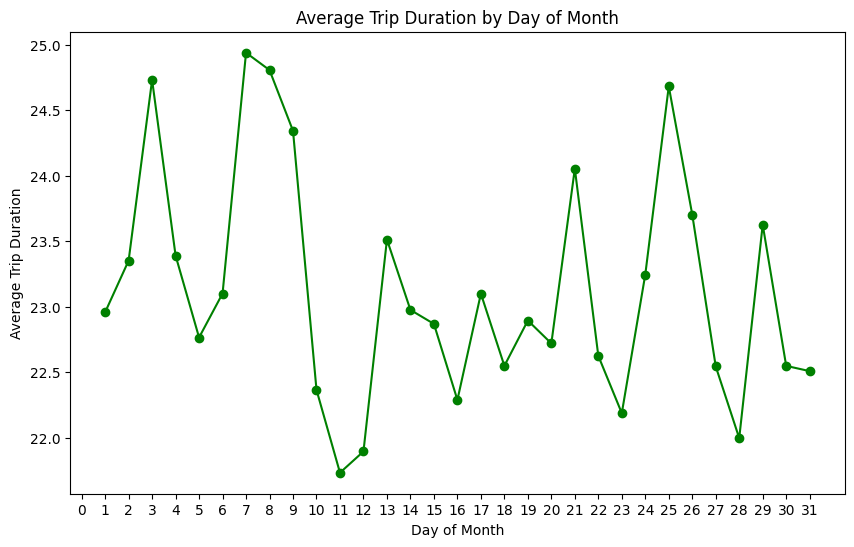

In [ ]:
# Calculate average trip duration by day of the month
df_avg_duration_by_day_of_month = df.groupby(['Pday'])['Duration'].mean()

# Plot average trip duration by day of the month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_month.index, df_avg_duration_by_day_of_month.values,'g-o')
plt.xlabel('Day of Month')
plt.xticks(range(len(df_avg_duration_by_day_of_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Month')
plt.show()

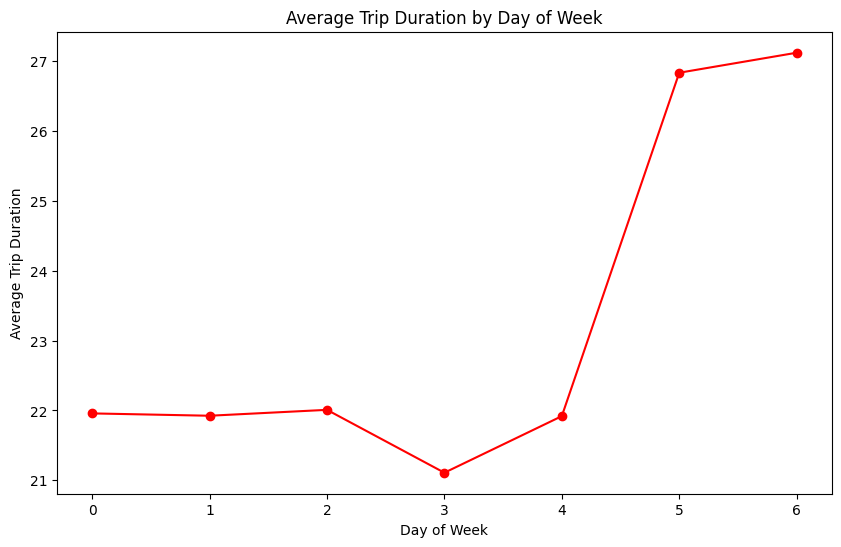

In [ ]:
# Calculate average trip duration by day of the week
df_avg_duration_by_day_of_week = df.groupby(['PDweek'])['Duration'].mean()

# Plot average trip duration by day of the week
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_week.index, df_avg_duration_by_day_of_week.values,'r-o')
plt.xlabel('Day of Week')
plt.xticks(range(len(df_avg_duration_by_day_of_week.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

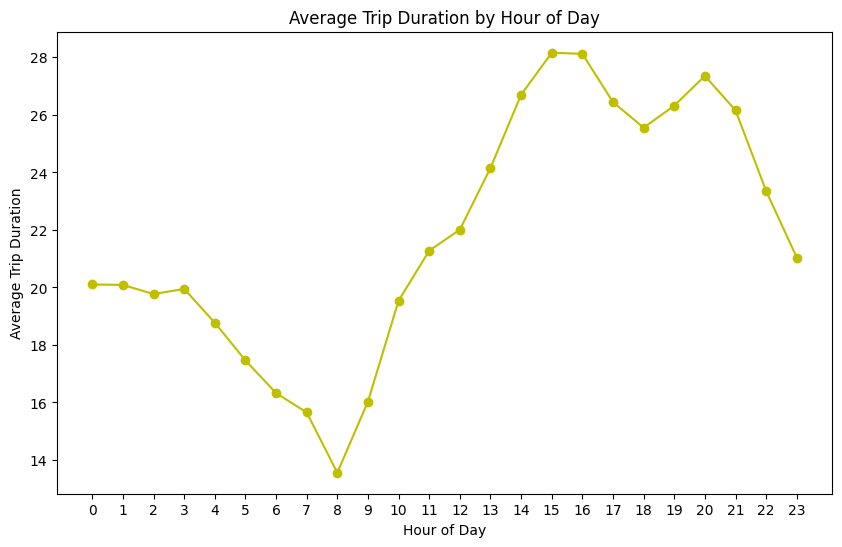

In [ ]:
# Calculate average trip duration by hour of the day
df_avg_duration_by_hour_of_day = df.groupby(['Phour'])['Duration'].mean()

# Plot average trip duration by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_hour_of_day.index, df_avg_duration_by_hour_of_day.values,'y-o')
plt.xlabel('Hour of Day')
plt.xticks(range(len(df_avg_duration_by_hour_of_day.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

**Observation:**
1. From Total pick ups and Average Trip Duration every months in a year plots
- The data shows a clear trend of increased pick-ups during the late summer and early fall months. The highest pick-ups occur in September and October, followed by June, July, and August.
- The total pick ups and average trip duration is low in months: noverber, december and january. Since, This is the period of time in which south korea experiences winter season.
- the data suggests that the average trip duration is highest in May and September.
- due to a combination of factors, including increased congestion, increased tourism, and favorable weather conditions.
2. From Average Trip Duration by Day of Week plot, We can observe that the trip duration is higer during weekends.
3. From Average Trip Duration by Hour of Day plot, The average trip duration is higer from 15th to 20th hour of a day. Typically after working hours or evening time.

__From the above observation we can say that temperature and time are influential factors for the estimation of the trip duration.__

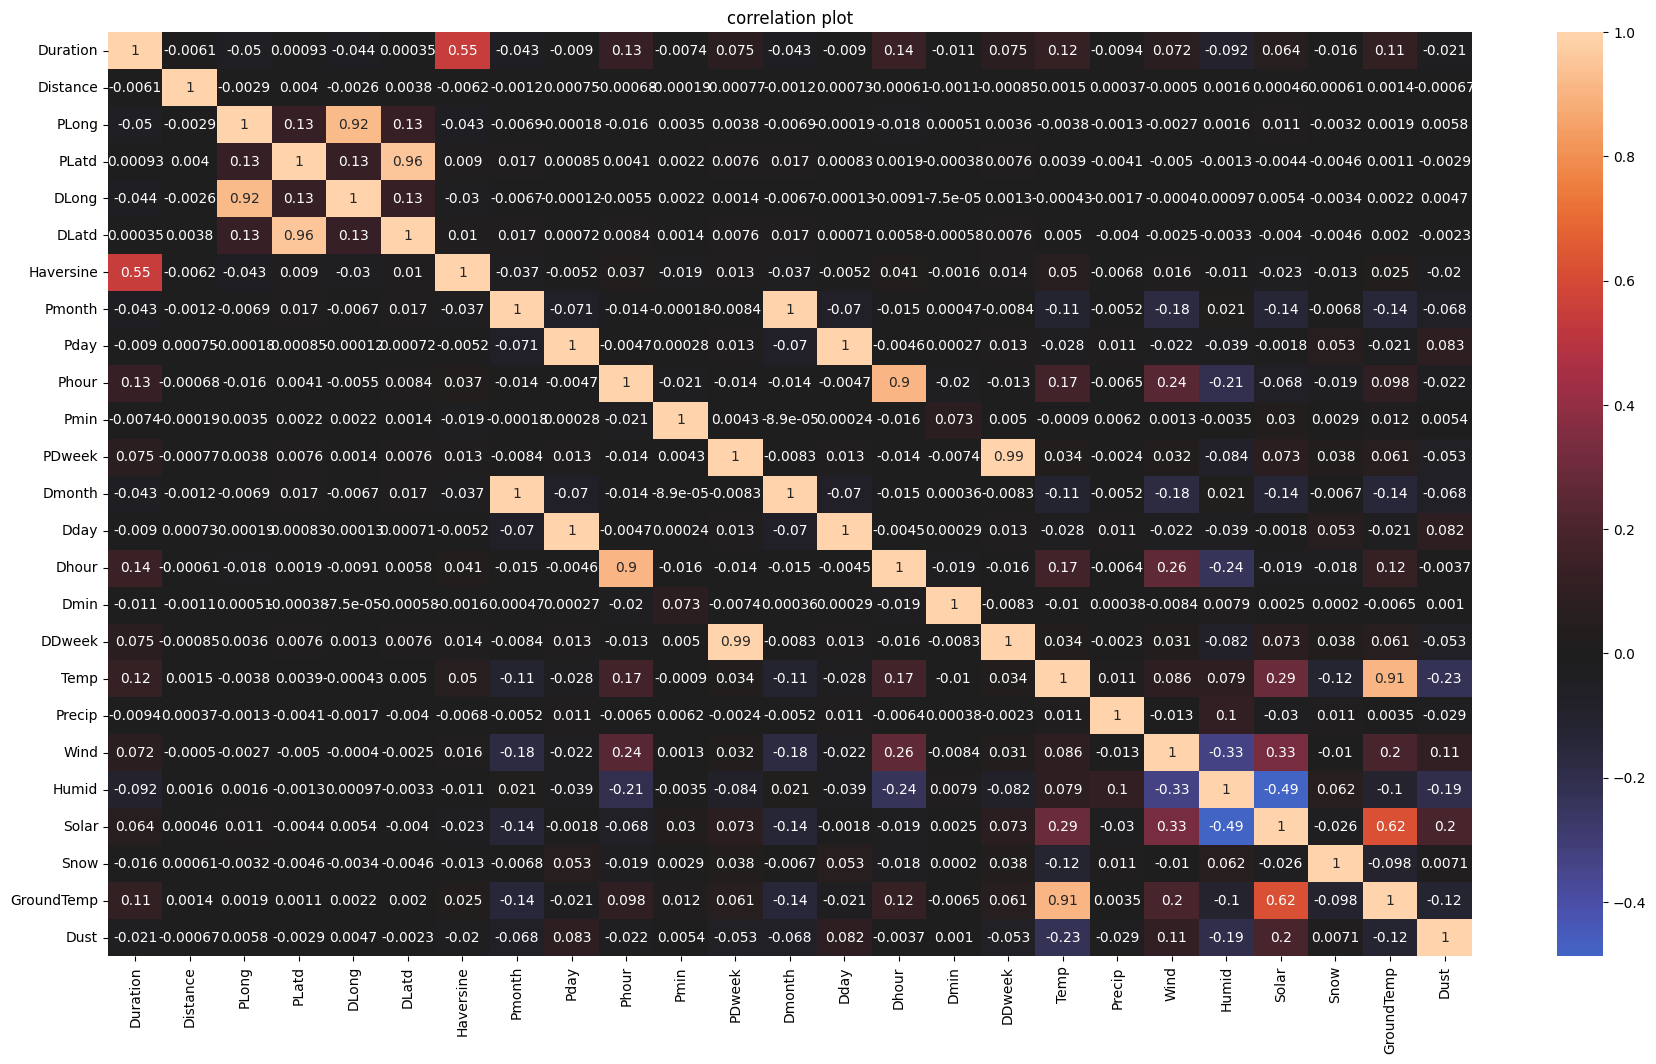

In [ ]:
plt.figure(figsize = (22,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("correlation plot")
plt.show()

**Observations:**
- Plong and Dlong are highly correlated. but they represent the pick up and drop off longitudes.
- Platd and Dlatd are highly correlated. but they represent the pick up and drop off lattitudes.
- Temp and GroundTemp are highly correlated, and Temp has more correlation with Duration (target data) when compared with GroundTemp.

## **3. Data Preparation and Splitting**

In [ ]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
df.shape

(8646056, 25)

In [ ]:
x = df.drop('Duration', axis=1)
y = df['Duration']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [ ]:
print("shape of X_train: ",X_train.shape)
print("shape of Y_train: ",y_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_test: ",y_test.shape)

shape of X_train:  (6484542, 24)
shape of Y_train:  (6484542,)
shape of X_test:  (2161514, 24)
shape of Y_test:  (2161514,)


In [ ]:
def get_metrics(y_true, predictions):
  mae = mean_absolute_error(y_true, predictions)
  mse = mean_squared_error(y_true, predictions)
  rmse = mean_squared_error(y_true, predictions)**0.5
  r2 = r2_score(y_true, predictions)

  print("="*50)
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"r2 Score: {r2}")
  print("="*50)

  # Return a dictionary containing the evaluation metrics.
  return {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## **4. Model Training and Evaluating**

### 4.1 Linear Regression

In [ ]:
def lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test):
    lrm = LinearRegression()
    lrm.fit(scaled_X_train, y_train)
    lrm_preds = lrm.predict(scaled_X_test)
    lrm_metrics = get_metrics(y_test, lrm_preds)
    return (lrm, lrm_metrics)

In [ ]:
lrm1, lrm1_metrics = lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test)

coefs_array = lrm1.coef_     # Get the coefficients of the model as a NumPy array
# Get the feature names
features = ['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust']

# Map the coefficients to the features using the zip() function
coefs_dict = dict(zip(features, coefs_array))

# Sort the coefficients dictionary in descending order by value
coefs_sorted = sorted(coefs_dict.items(), key=lambda x: x[1], reverse=True)

# Create a Pandas DataFrame from the coefficients dictionary
coefs_df = pd.DataFrame(coefs_sorted, columns=['Feature', 'Coefficient'])

# Print the DataFrame
print(coefs_df.to_string())

MAE: 12.133211491600493
MSE: 349.88901284832247
RMSE: 18.705320442278513
r2 Score: 0.33055044605026196
       Feature  Coefficient
0       Dmonth    22.139869
1    Haversine    12.343979
2         Temp     3.443900
3         Dday     1.608016
4        Dhour     1.554036
5        Solar     1.528050
6       DDweek     1.459193
7        Phour     0.520972
8        PLatd     0.439909
9         Wind     0.126851
10        Pmin     0.081898
11        Snow     0.067983
12      Precip     0.007651
13    Distance    -0.073327
14      PDweek    -0.078514
15        Dust    -0.153941
16        Dmin    -0.166162
17       PLong    -0.195677
18       DLong    -0.425696
19       DLatd    -0.488493
20       Humid    -1.151783
21        Pday    -1.756183
22  GroundTemp    -2.290364
23      Pmonth   -22.339007


1. The coefficient for the **Dmonth** feature is positive and large, which means that an increase in the month of the year is associated with an increase in the predicted value.
2. The coefficient for the **PDweek** feature is negative, which means that an increase in the day of the week is associated with a decrease in the predicted value.

> **NOTE:** The most important features in our model are the ones with the largest coefficients, both in absolute value and in relation to the other coefficients. In this case, the most important features are _Dmonth, Haversine, and Temp._

In [ ]:
x.columns

Index(['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmonth',
       'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin',
       'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
# Create a list of the important features
important_features = []
for i in range(len(coefs_array)):
    if abs(coefs_array[i]) >= 0.50:
        important_features.append(features[i])

print(important_features)

not_important = [col for col in x.columns if col not in important_features]

# Print the list of unimportant columns
print(not_important)

['Haversine', 'Pmonth', 'Pday', 'Phour', 'Dmonth', 'Dday', 'Dhour', 'DDweek', 'Temp', 'Humid', 'Solar', 'GroundTemp']
['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Pmin', 'PDweek', 'Dmin', 'Precip', 'Wind', 'Snow', 'Dust']


In [ ]:
# Create a new dataframe with only the important features
a = x[important_features]
b = y

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=40)
# Scaling the data
scaler = StandardScaler()
scaled_a_train = scaler.fit_transform(a_train)
scaled_a_test = scaler.fit_transform(a_test)

lrm_2 = lrm_train_test(scaled_a_train, b_train,scaled_a_test, b_test)

MAE: 12.139408111572266
MSE: 350.35626220703125
RMSE: 18.717806020125096
r2 Score: 0.3296564053724067


### 4.2 XGBoost Regressor

In [ ]:
xgb = XGBRegressor(random_state=20)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=20, ...)

In [ ]:
xgb_preds = xgb.predict(X_test)
print("Metrics for test data predictions")
xgb_test_metrics = get_metrics(y_test, xgb_preds)
xgb_test_metrics

Metrics for test data predictions
MAE: 2.8198184967041016
MSE: 27.051088333129883
RMSE: 5.20106607659717
r2 Score: 0.9482426267985536


{'mae': 2.8198185,
 'mse': 27.051088,
 'rmse': 5.20106607659717,
 'r2': 0.9482426267985536}

In [ ]:
print("Metrics for train data predictions")
xgb_train_metrics = get_metrics(y_train, xgb.predict(X_train))
xgb_train_metrics

Metrics for train data predictions
MAE: 2.808656692504883
MSE: 26.583017349243164
RMSE: 5.155872123049908
r2 Score: 0.9491534134095865


{'mae': 2.8086567,
 'mse': 26.583017,
 'rmse': 5.155872123049908,
 'r2': 0.9491534134095865}

### 4.3 LightXGM Boost Regressor

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor(random_state=20, n_jobs=-1)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=20)

In [ ]:
lgbm_preds = lgbm.predict(X_test)
lightgbm_metrics = get_metrics(y_test, lgbm_preds)
lightgbm_metrics

MAE: 4.803510089027296
MSE: 68.85425148407442
RMSE: 8.29784619549401
r2 Score: 0.868259801677343


{'mae': 4.803510089027296,
 'mse': 68.85425148407442,
 'rmse': 8.29784619549401,
 'r2': 0.868259801677343}

### 4.4 Random Forest Regressor

In [ ]:
xrf = x.sample(frac=0.06, random_state=20)
yrf = y.sample(frac=0.06, random_state=20)

In [ ]:
print(xrf.shape)
print(yrf.shape)

(518763, 24)
(518763,)


In [ ]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(xrf, yrf, test_size=0.25, random_state=40)

In [ ]:
"""
rf = RandomForestRegressor(random_state=20)
rf.fit(Xrf_train, yrf_train)
rf_preds = rf.predict(Xrf_test)
rf_test_metrics = get_metrics(yrf_test, rf_preds)
print("Metrics for test data predictions")
rf_test_metrics
print("Metrics for train data predictions")
rf_train_metrics = get_metrics(yrf_train, rf.predict(xrftrain))
"""

'\nrf = RandomForestRegressor(random_state=20)\nrf.fit(Xrf_train, yrf_train)\nrf_preds = rf.predict(Xrf_test)\nrf_test_metrics = get_metrics(yrf_test, rf_preds)\nprint("Metrics for test data predictions")\nrf_test_metrics\nprint("Metrics for train data predictions")\nrf_train_metrics = get_metrics(yrf_train, rf.predict(xrftrain))\n'

In [ ]:
# after running the above code the following results were achieved
rf_test_metrics = {}
# Enter the MAE value.
rf_test_metrics["mae"] = 3.830127605873447
# Enter the MSE value.
rf_test_metrics["mse"] = 62.34920124083568
# Enter the RMSE value.
rf_test_metrics["rmse"] = 7.8961510396417625
# Enter the r2 score.
rf_test_metrics["r2"] = 0.8818096688564994

In [ ]:
import tabulate

from tabulate import tabulate

# Create a dictionary to store the metric values
evaluation_metrics = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Linear Regression": [lrm1_metrics["mae"], lrm1_metrics["mse"], lrm1_metrics["rmse"], lrm1_metrics["r2"]],
    "XGBoost Regressor": [xgb_test_metrics["mae"], xgb_test_metrics["mse"], xgb_test_metrics["rmse"], xgb_test_metrics["r2"]],
    "LightGBM Regressor": [lightgbm_metrics["mae"], lightgbm_metrics["mse"], lightgbm_metrics["rmse"], lightgbm_metrics["r2"]],
    "Random Forest Regressor": [rf_test_metrics["mae"], rf_test_metrics["mse"], rf_test_metrics["rmse"], rf_test_metrics["r2"]]
}

# Format the dictionary values by rounding to 2 decimal places
for key in evaluation_metrics:
    if key != "Metric":
        evaluation_metrics[key] = [round(value, 2) for value in evaluation_metrics[key]]


# Format the dictionary as a table
table = tabulate(evaluation_metrics, headers='keys', tablefmt='fancy_grid')

# table title
print("\033[1m\033[4mModel Performance Comparison\033[0m")

# Print the tabulated comparison
print(table)

Model Performance Comparison
╒══════════╤═════════════════════╤═════════════════════╤══════════════════════╤═══════════════════════════╕
│ Metric   │   Linear Regression │   XGBoost Regressor │   LightGBM Regressor │   Random Forest Regressor │
╞══════════╪═════════════════════╪═════════════════════╪══════════════════════╪═══════════════════════════╡
│ MAE      │               12.13 │                2.82 │                 4.8  │                      3.83 │
├──────────┼─────────────────────┼─────────────────────┼──────────────────────┼───────────────────────────┤
│ MSE      │              349.89 │               27.05 │                68.85 │                     62.35 │
├──────────┼─────────────────────┼─────────────────────┼──────────────────────┼───────────────────────────┤
│ RMSE     │               18.71 │                5.2  │                 8.3  │                      7.9  │
├──────────┼─────────────────────┼─────────────────────┼──────────────────────┼───────────────────────────┤

___

## **Conclusion:**

Based on the table, the XGBoost Regressor has the best overall performance, followed by the LightGBM Regressor, the Random Forest Regressor, and the Linear Regression model.

The XGBoost Regressor has the lowest MAE, MSE, and RMSE scores, and the highest R2 score. This means that it is the most accurate model at predicting the target variable, and it explains the most variation in the target variable.

The LightGBM Regressor has the second-best overall performance, with slightly higher MAE, MSE, and RMSE scores than the XGBoost Regressor, and a slightly lower R2 score. However, it is still a very accurate model, and it is often faster than the XGBoost Regressor to train and predict.

The Random Forest Regressor has the third-best overall performance, with slightly higher MAE, MSE, and RMSE scores than the LightGBM Regressor, and a slightly lower R2 score. However, it is still a good model for regression tasks, and it is often less sensitive to overfitting than other models.

The Linear Regression model has the worst overall performance, with the highest MAE, MSE, and RMSE scores, and the lowest R2 score. This means that it is the least accurate model at predicting the target variable, and it explains the least variation in the target variable. However, it is still a useful model for simple regression tasks, and it is often very fast to train and predict.

___